1) Delivery_time -> Predict delivery time using sorting time 


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

In [47]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [58]:
dtime=pd.read_csv(r"C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\SLR\delivery_time.csv")

In [59]:
dtime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


PERFORMING EDA ON DATA


In [5]:
dtime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [39]:
dtime.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

CHECKING FOR DUPLICATES VALUE

In [40]:
dtime[dtime.duplicated()].shape

(0, 2)

In [41]:
dtime[dtime.duplicated()]

,Delivery_Time,Sorting_Time


PLOTTING DATA TO CHECK FOR OUTLIER

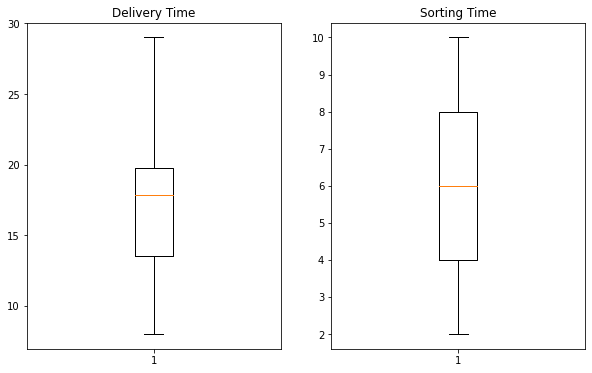

In [62]:
plt.subplots(figsize = (10,6))
plt.subplot(121)
plt.boxplot(dtime['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(dtime['Sorting Time'])
plt.title('Sorting Time')
plt.show()

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

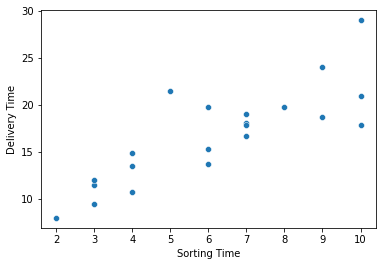

In [7]:
sns.scatterplot(y=dtime['Delivery Time'],x=dtime['Sorting Time'])

In [8]:
dtime.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Checking for Homoscedasticity or Hetroscedasticity

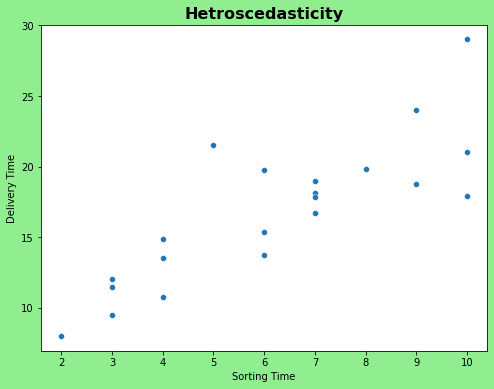

In [63]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = dtime['Sorting Time'], y = dtime['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

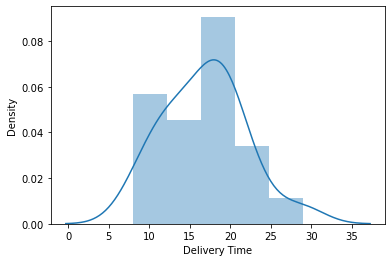

In [9]:
sns.distplot(dtime['Delivery Time'],label = "Delivery Time")


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

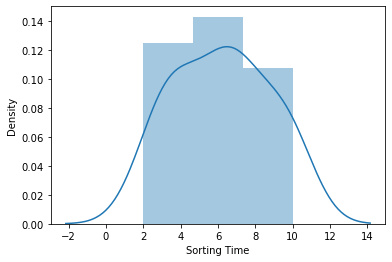

In [10]:
sns.distplot(dtime['Sorting Time'])

Feature Engineering

Trying different transformation of data to estimate normal distribution and to remove any skewness

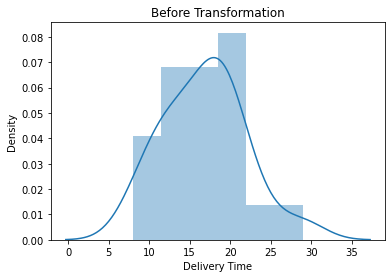

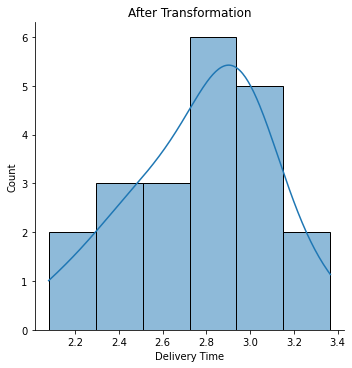

In [64]:
sns.distplot(dtime['Delivery Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dtime['Delivery Time']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

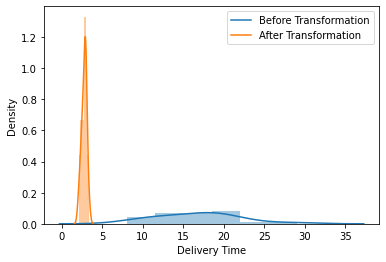

In [66]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dtime['Delivery Time'], bins = 6, kde = True)
sns.distplot(np.log(dtime['Delivery Time']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

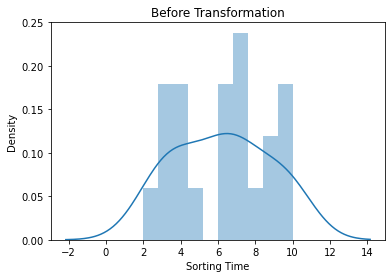

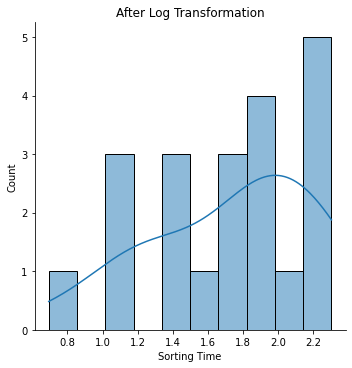

In [74]:
sns.distplot(dtime['Sorting Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dtime['Sorting Time']), bins = 10, kde = True)
plt.title('After Log Transformation')
plt.show()

As you can see
How log transformation affects the data and it scales the values down.
Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

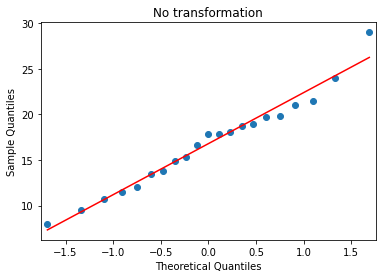

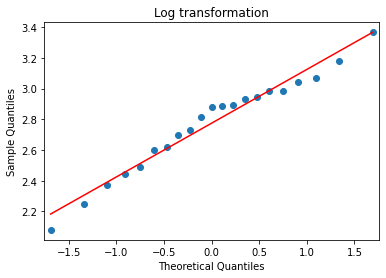

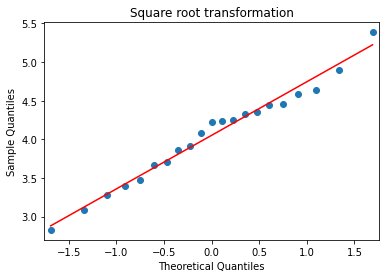

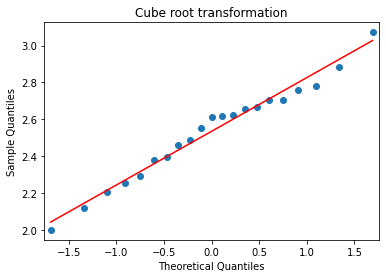

In [69]:
smf.qqplot(dtime['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dtime['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dtime['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dtime['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

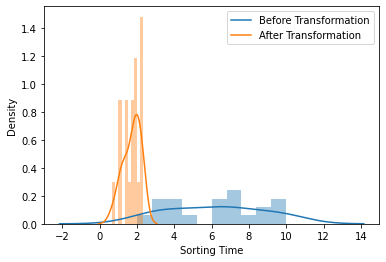

In [70]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dtime['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(dtime['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

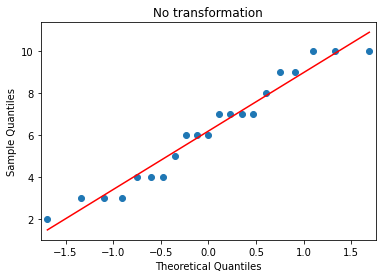

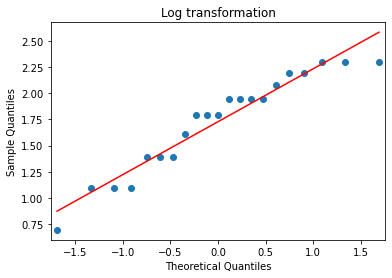

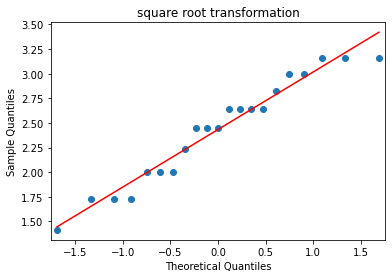

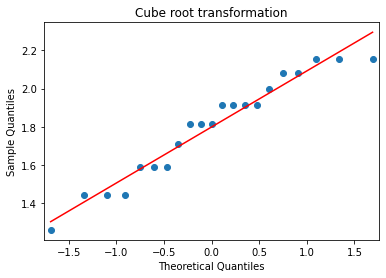

In [73]:
smf.qqplot(dtime['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dtime['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dtime['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(dtime['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [11]:
dtime = dtime.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)

In [12]:
model= smf.ols("Delivery_Time~Sorting_Time",data=dtime).fit()


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

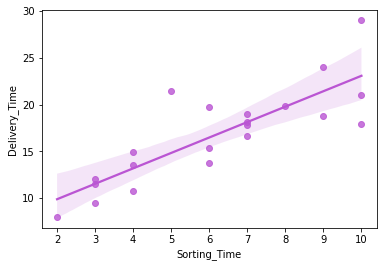

In [13]:
sns.regplot(x="Sorting_Time", y="Delivery_Time",data=dtime,color='mediumorchid')

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        11:52:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

Predict for new data point

In [16]:
#predict for 10 and 15 sorting time

In [17]:
newdata=pd.Series([14,81])

In [18]:
data_pre=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [19]:
data_pre

,Sorting_Time
0,14
1,81


In [20]:
model.predict(data_pre)

0     29.669013
1    140.153346
dtype: float64

Salary_hike -> Build a prediction model for Salary_hike

In [21]:
shike=pd.read_csv(r'C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\SLR\Salary_Data.csv')

In [22]:
shike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
shike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [24]:
shike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

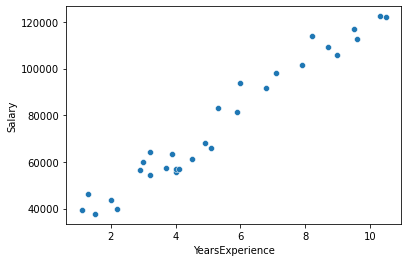

In [25]:
sns.scatterplot(x="YearsExperience",y="Salary",data=shike)

In [26]:
shike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

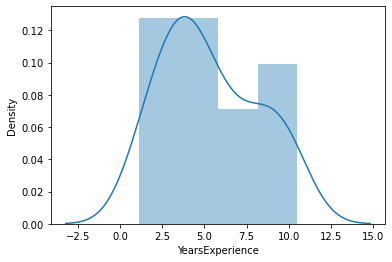

In [27]:
sns.distplot(shike['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

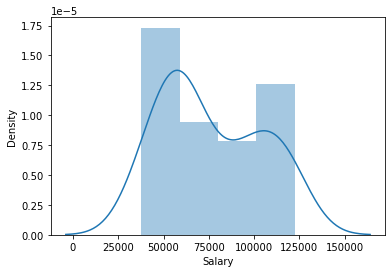

In [28]:
sns.distplot(shike['Salary'])

In [29]:
model=smf.ols('Salary~YearsExperience',data=shike).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

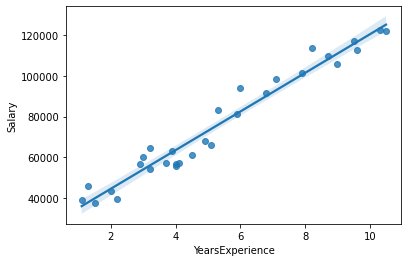

In [30]:
sns.regplot(x='YearsExperience',y='Salary',data=shike)

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        11:52:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(model.pvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [33]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [34]:
newdata=pd.Series([6,7])

In [35]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [36]:
data_pred

,YearsExperience
0,6
1,7


In [37]:
model.predict(data_pred)

0    82491.974127
1    91941.936449
dtype: float64